In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = 20, 10
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
# 지표를 하나만 설정할 경우
from sklearn.model_selection import cross_val_score
# 지표를 하나 이상 설정할 경우
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 모델의 최적의 하이퍼파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 시간 측정을 위한 시간 모듈
import datetime

# 타이타닉 사망 생존 데이터
- 타이타닉 호 승객에 관련된 정보
- kaggle 에서 제공되는 데이터
- train.csv 를 학습 시켜 test.csv에 대한 사망 생존을 예측 한다.

### 데이터를 읽어온다.

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test_df = pd.read_csv('data/test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- PassengerId : 승객번호. 1 부터 1씩 증가시킨 값. 의미없음
- Survived : 생존여부. 0 - 사망, 1 - 생존
- Pclass : 승객 등급. 1 ~ 3등급
- Name : 승객 이름
- Sex : 성별. male - 남성, female - 여성
- Age : 승객 나이
- SibSp : 동승한 형제 자매 수
- Parch : 동승한 부모 자식 수
- Ticket : 티켓 번호
- Fare : 요금
- Cabin : 객실번호
- Embarked : 선창장. C - Cherbourg, Q - Queenstown, S - Southampton

### 데이터 프레임 정보 확인

In [4]:
# 결측치 확인
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 데이터 전처리

In [6]:
# 처리의 용이성을 위해 두 데이터 프레임을 합친다.
data = pd.concat((train_df, test_df))
# 인덱스를 다시 초기화  해준다.
data.reset_index(drop=True, inplace=True)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
# 전체 결측치 확인
data.isna().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### PassengerId
- 승객 일련 번호
- 1 부터 1씩 증가시킨 값으로 의미가 없다.
- 사용하지 않을 것이다.

### Pclass
- 승객 등급
- 1 - 1등급, 2 - 2등급, 3 - 3등급

In [8]:
# 결측치 확인
data['Pclass'].isna().sum()

0

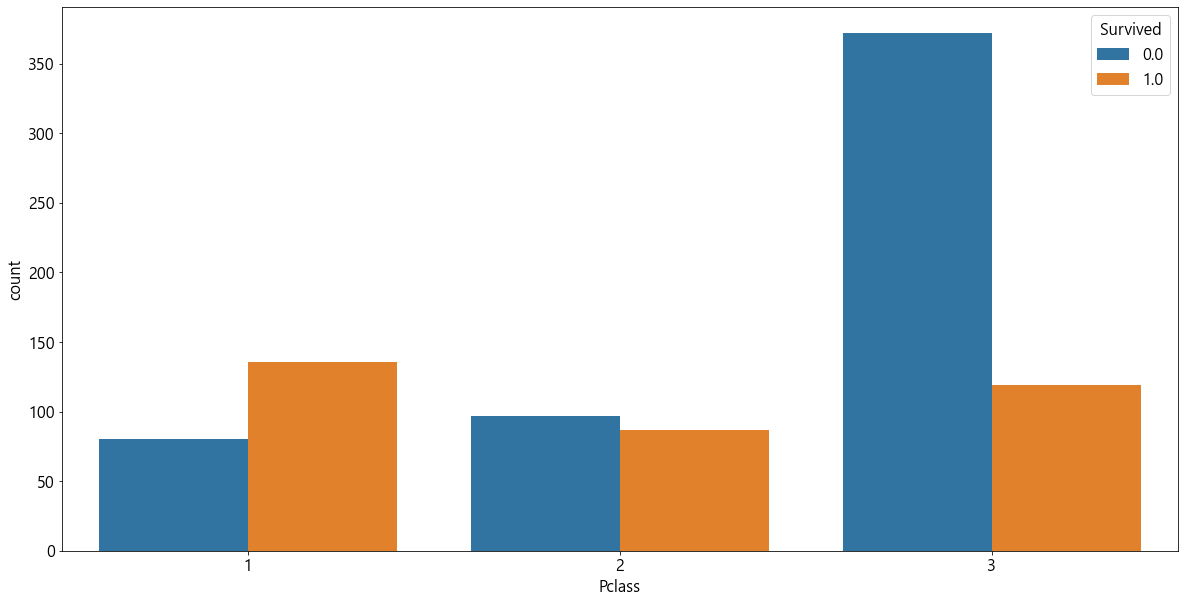

In [9]:
# 결측치를 제외하고 데이터가 같은 것 끼리 그룹으로 묶어 그 수를 구해 그래프로
# 그린다.
# x = 수를 계산할 컬럼
# hue = 결과데이터 컬럼
sns.countplot(data=data, x='Pclass', hue='Survived')
plt.show()

1 등석은 생존률이 높고 3등석은 사망률이 높다.

### Name 
- 이름

In [10]:
# LastName 컬럼 추가
data['LastName'] = 0

# 정규식 : 문자열의 양식을 지정할 때 사용하는 문자식
# ([A-Za-z]+) : 앞에서부터 대소문자 영문에 해당하는 것 까지만 해당
# 한글 : 가-힣
data['LastName'] = data['Name'].str.extract('([A-Za-z]+)')
data['LastName']

0          Braund
1         Cumings
2       Heikkinen
3        Futrelle
4           Allen
          ...    
1304      Spector
1305        Oliva
1306      Saether
1307         Ware
1308        Peter
Name: LastName, Length: 1309, dtype: object

In [11]:
# LastName의 정보를 파악한다.
data['LastName'].value_counts()

O             12
Andersson     11
Sage          11
Goodwin        8
Asplund        8
              ..
Willard        1
Mack           1
Henriksson     1
Leonard        1
Giglio         1
Name: LastName, Length: 853, dtype: int64

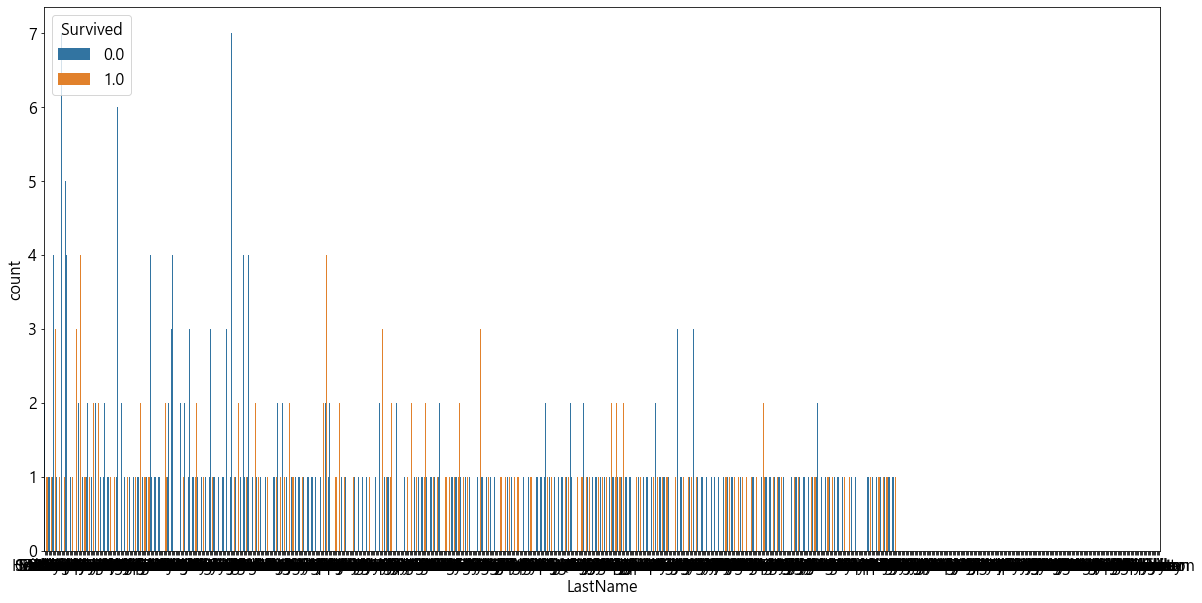

In [12]:
sns.countplot(data=data, x='LastName', hue='Survived')
plt.show()

일부 LastName에 대해 생존률과 사망률이 높은 것이 소수 존재한다.

### Sex
- 성별
- male : 남성, female 여성

In [13]:
# 결측치 확인
data['Sex'].isna().sum()

0

In [14]:
# 값 종류 확인
data['Sex'].value_counts().index

Index(['male', 'female'], dtype='object')

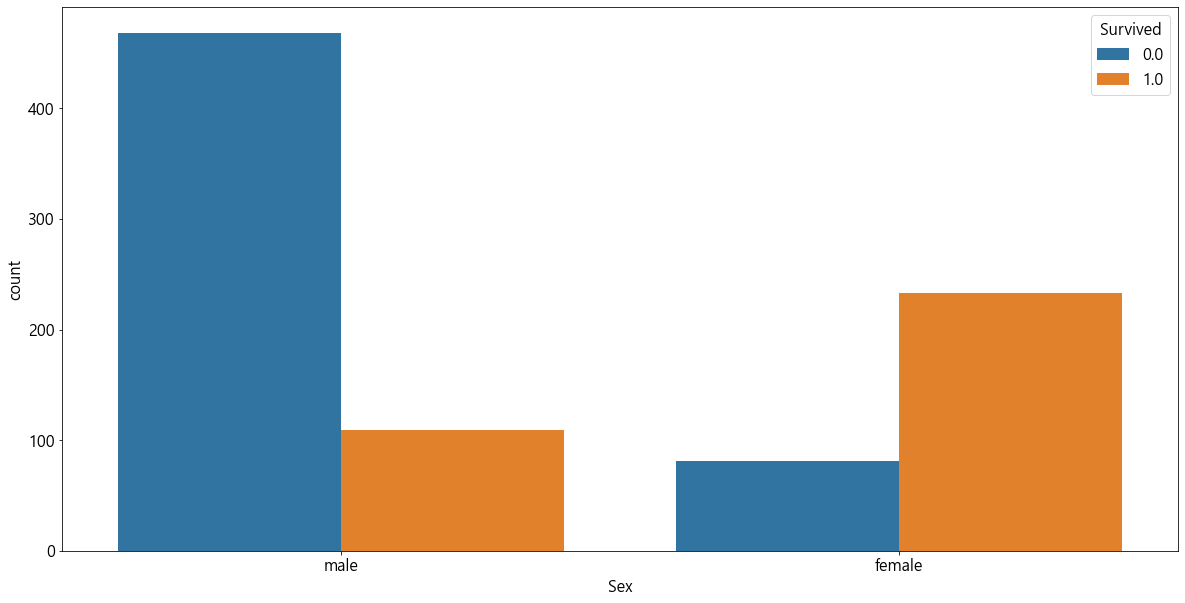

In [15]:
# 사망생존 비율 확인
sns.countplot(data=data, x='Sex', hue='Survived')
plt.show()

남성은 사망확률이 높고 여성은 생존확률이 높다.

### Age
- 나이

In [16]:
# 결측치 확인
data['Age'].isna().sum()

263

In [17]:
# 이름에서 이니셜을 추출한다.
data['Initial'] = 0

# ([A-Za-z]+)\. : A-Za-z로 구성되어 있고 마지막이 . 으로  끝나는것
data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.')
data['Initial']

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
         ...  
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Initial, Length: 1309, dtype: object

In [18]:
# Initial 기준으로 그룹을 묶고 나이의 평균을 구한다.
data.groupby('Initial')['Age'].mean()

Initial
Capt        70.000000
Col         54.000000
Countess    33.000000
Don         40.000000
Dona        39.000000
Dr          43.571429
Jonkheer    38.000000
Lady        48.000000
Major       48.500000
Master       5.482642
Miss        21.774238
Mlle        24.000000
Mme         24.000000
Mr          32.252151
Mrs         36.994118
Ms          28.000000
Rev         41.250000
Sir         49.000000
Name: Age, dtype: float64

In [19]:
# 이니셜별 나이의 평균을 구한다.
a1 = data.groupby('Initial')['Age']


# 결측치인 부분에 데이터를 담는다.
data['Age'] = a1.apply(lambda x : x.fillna(x.mean()))
data['Age'].isna().sum()

0

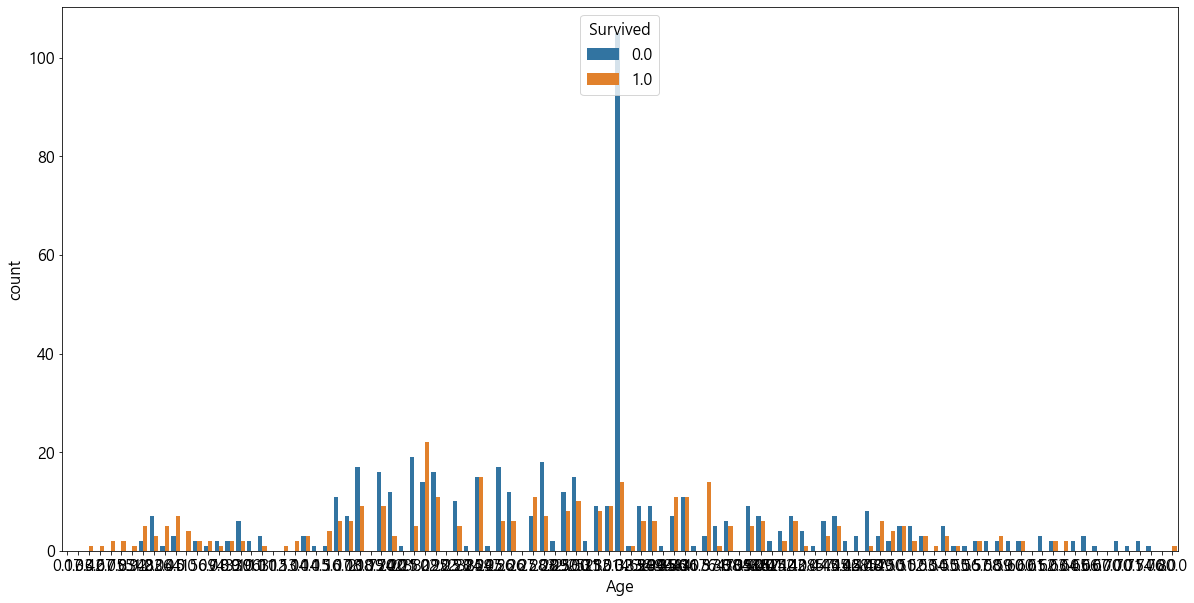

In [20]:
sns.countplot(data=data, x='Age', hue='Survived')
plt.show()

영유아는 생존률이 높다

### SibSp : 동승한 형제, 자매 수

In [21]:
data['SibSp'].isna().sum()

0

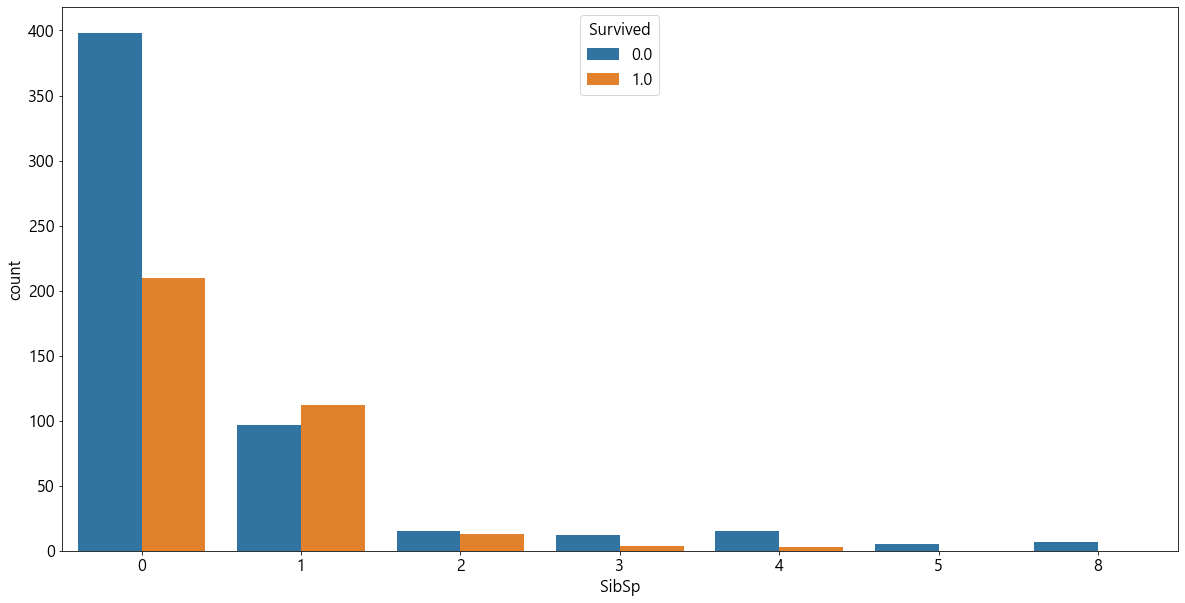

In [22]:
sns.countplot(data=data, x='SibSp', hue='Survived')
plt.show()

동승한 형제 자매수에 따라 생존률이 다르다.

### Parch : 동승한 부모 자식 수

In [23]:
data['Parch'].isna().sum()

0

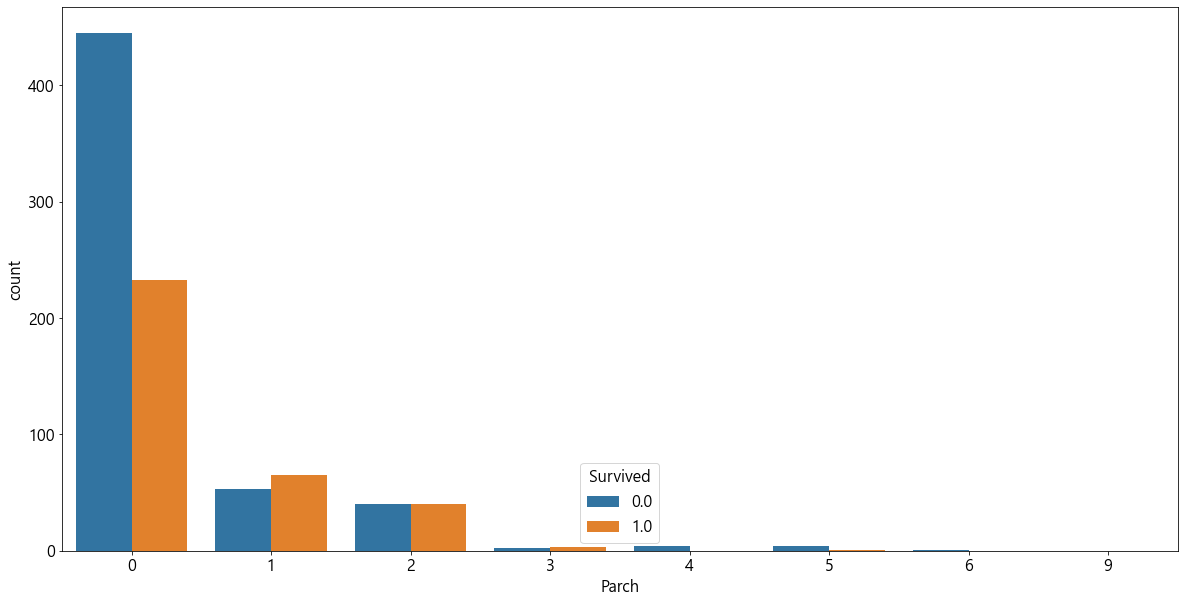

In [24]:
sns.countplot(data=data, x='Parch', hue='Survived')
plt.show()

동승한 부모 자식수에 따라 생존률이 달라진다.

### Ticket
- 티켓 번호

In [25]:
data['Ticket'].isna().sum()

0

In [26]:
data['Ticket'].value_counts()

CA. 2343         11
1601              8
CA 2144           8
PC 17608          7
347082            7
                 ..
347075            1
S.O./P.P. 752     1
113792            1
226593            1
349238            1
Name: Ticket, Length: 929, dtype: int64

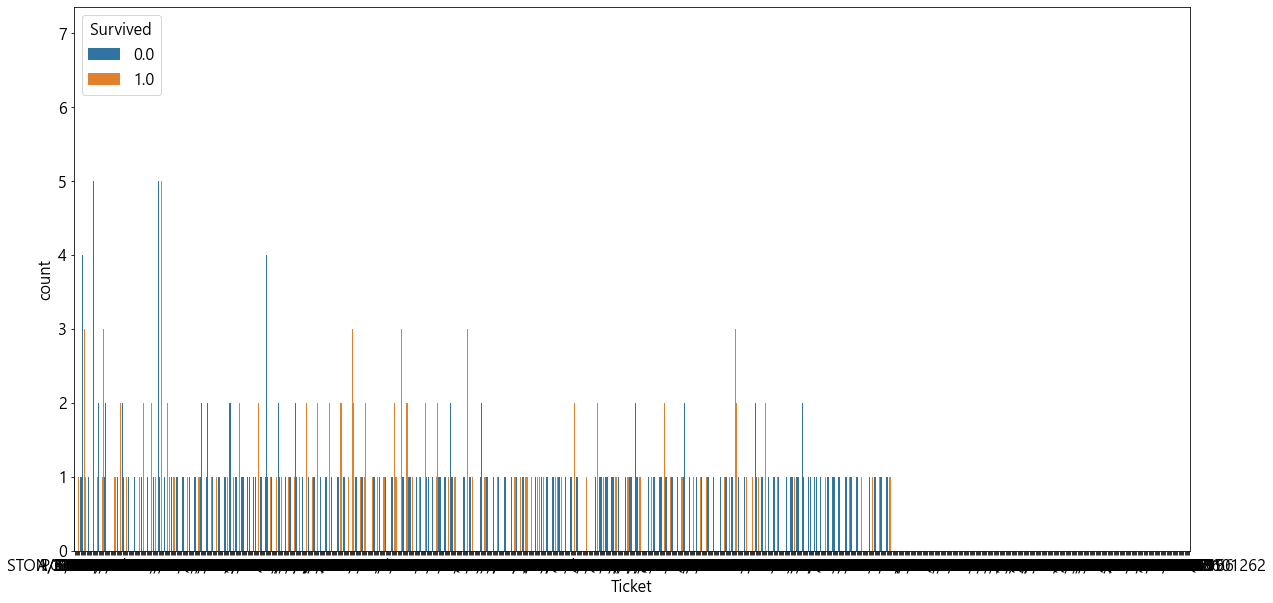

In [27]:
sns.countplot(data=data, x='Ticket', hue='Survived')
plt.show()

티켓 번호가 같은 것 중 일부는 사망 생존률이 달라진다.

### Fare
- 요금

In [28]:
data['Fare'].isna().sum()

1

In [29]:
# 요금의 전체 평균을 구해서 결측치에 채워준다.
a1 = data['Fare'].mean()

data['Fare'].fillna(a1, inplace=True)

data['Fare'].isna().sum()

0

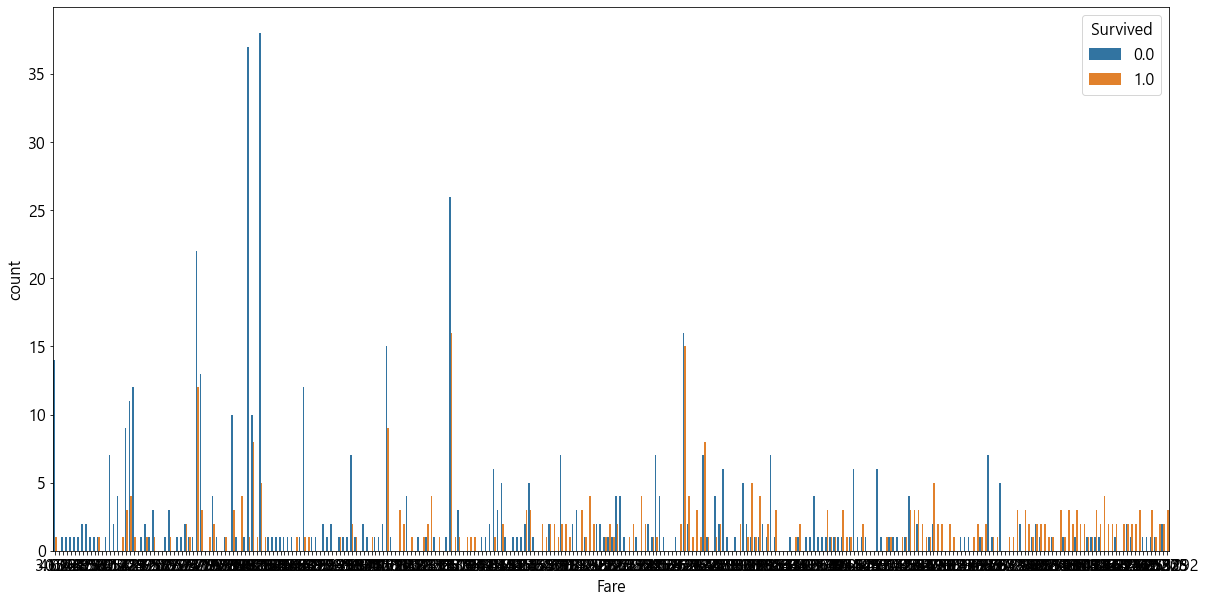

In [30]:
sns.countplot(data=data, x='Fare', hue='Survived')
plt.show()

요금이 낮을 수록 사망 확률이 올라가고 요금이 높을 수록 생존확률이 올라간다.

### Cabin
- 객실

In [31]:
data['Cabin'].isna().sum()

1014

In [32]:
# 앞의 알파벳 부분까지만 추출한다.
# ([A-Za-z]) : 앞에 알파벳으로 시작하는 것들 중에 한글자만 가져온다.
a1 = data['Cabin'].str.extract('([A-Za-z])')

data['Cabin2'] = a1
data['Cabin2']

0       NaN
1         C
2       NaN
3         C
4       NaN
       ... 
1304    NaN
1305      C
1306    NaN
1307    NaN
1308    NaN
Name: Cabin2, Length: 1309, dtype: object

In [33]:
# 1등석인 사람들의 객실 정보를 확인한다.
a1 = data.query('Pclass == 1')
# 확인한다.
a1['Cabin2'].value_counts()

C    94
B    65
D    40
E    34
A    22
T     1
Name: Cabin2, dtype: int64

In [34]:
# 2등석인 사람들의 객실 정보를 확인한다.
a1 = data.query('Pclass == 2')
# 확인한다.
a1['Cabin2'].value_counts()

F    13
D     6
E     4
Name: Cabin2, dtype: int64

In [35]:
# 3등석인 사람들의 객실 정보를 확인한다.
a1 = data.query('Pclass == 3')
# 확인한다.
a1['Cabin2'].value_counts()

F    8
G    5
E    3
Name: Cabin2, dtype: int64

In [36]:
# 각 등급마다 겹치는 객실이 있으므로 1등석은 X, 2등석은 Y, 3등은 Z라는 
# 가상의 객실을 만들어 모두 담아준다.

# 각 등급별 로우를 각각 가져온다.
a1 = data.query('Pclass == 1')
a2 = data.query('Pclass == 2')
a3 = data.query('Pclass == 3')

# 각각에서 Cabin이 결측치인 사람들의 정보만 가져온다.
a10 = a1.loc[a1['Cabin'].isna()]
a20 = a2.loc[a2['Cabin'].isna()]
a30 = a3.loc[a3['Cabin'].isna()]

# 가상의 객실로 채워준다.
data.loc[a10.index, 'Cabin2'] = 'X'
data.loc[a20.index, 'Cabin2'] = 'Y'
data.loc[a30.index, 'Cabin2'] = 'Z'

In [37]:
data['Cabin2'].value_counts()

Z    693
Y    254
C     94
X     67
B     65
D     46
E     41
A     22
F     21
G      5
T      1
Name: Cabin2, dtype: int64

In [38]:
data['Cabin2'].isna().sum()

0

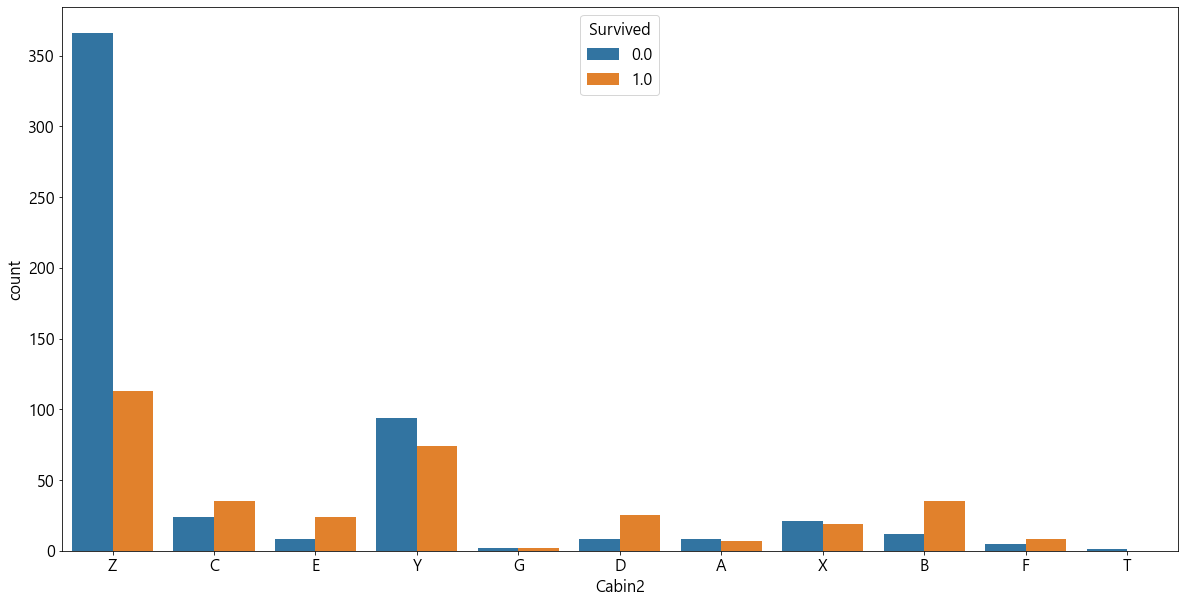

In [39]:
sns.countplot(data=data, x='Cabin2', hue='Survived')
plt.show()

3 등석 객실일 경우 사망 확률이 올라간다

### Embarked
- 선착장

In [40]:
# 결측치 확인
data['Embarked'].isna().sum()

2

In [41]:
data['Embarked'].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [42]:
# 결측치를 제일 많은 S로 채워준다.
a1 = data.loc[data['Embarked'].isna()]
data.loc[a1.index, 'Embarked'] = 'S'
data['Embarked'].isna().sum()

0

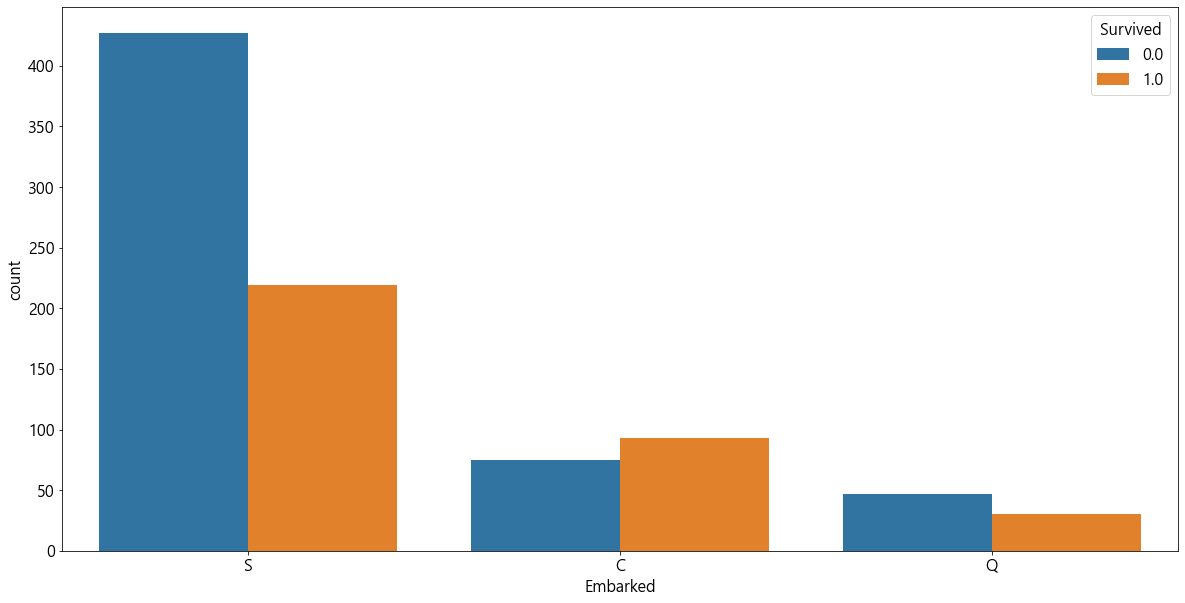

In [43]:
sns.countplot(data=data, x='Embarked', hue='Survived')
plt.show()

S 에서 탑승한 승객들은 사망 확률이 높다

# 머신러닝을 데이터 전처리

In [44]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Initial,Cabin2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,Z


In [45]:
# 컬럼 이름 목록
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'LastName', 'Initial',
       'Cabin2'],
      dtype='object')

In [46]:
# 원본 유지를 위해 데이터 프레임을 복제한다.
df1 = data.copy()
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,LastName,Initial,Cabin2
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Z
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Z
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S,Futrelle,Mrs,C
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S,Allen,Mr,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,32.252151,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Z
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C,Oliva,Dona,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Z
1307,1308,NaN,3,"Ware, Mr. Frederick",male,32.252151,0,0,359309,8.0500,NaN,S,Ware,Mr,Z


In [47]:
# 불필요한 컬럼 제거
drop_list = ['PassengerId', 'Survived', 'Name', 'SibSp', 'Parch', 'Cabin']

df1.drop(drop_list, axis=1, inplace=True)
df1.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2
0,3,male,22.0,A/5 21171,7.2500,S,Braund,Mr,Z
1,1,female,38.0,PC 17599,71.2833,C,Cumings,Mrs,C
2,3,female,26.0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Z
3,1,female,35.0,113803,53.1000,S,Futrelle,Mrs,C
4,3,male,35.0,373450,8.0500,S,Allen,Mr,Z


In [48]:
# 가족수를 구한다.
# Parch + SibSp + 자기자신
# 주의. 한쪽 컬럼에 결측치가 존재하면 결과는 결치가 된다.
df1['FamilySize'] = data['SibSp'] + data['Parch'] + 1
df1.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize
0,3,male,22.0,A/5 21171,7.2500,S,Braund,Mr,Z,2
1,1,female,38.0,PC 17599,71.2833,C,Cumings,Mrs,C,2
2,3,female,26.0,STON/O2. 3101282,7.9250,S,Heikkinen,Miss,Z,1
3,1,female,35.0,113803,53.1000,S,Futrelle,Mrs,C,2
4,3,male,35.0,373450,8.0500,S,Allen,Mr,Z,1


In [49]:
# 문자열을 숫자로 변환한다.
# 만약 변환 된 것을 나중에 복원해야 할 경우 LabelEncoder를 사용한다
# 특히 결과 데이터가 문자열일 경우 나중에 예측 결과를 문자열로 복원해야기 
# 때문에 받드시 LabelEncoder 를 사용해야 한다.
# 하지만 입력데이터는 복원할 일이 없기 때문에 pandas가 제공하는
# factorize 함수를 사용하는것이 편하다
df1['Sex'] = df1['Sex'].factorize()[0]
df1['Ticket'] = df1['Ticket'].factorize()[0]
df1['Embarked'] = df1['Embarked'].factorize()[0]
df1['LastName'] = df1['LastName'].factorize()[0]
df1['Initial'] = df1['Initial'].factorize()[0]
df1['Cabin2'] = df1['Cabin2'].factorize()[0]
df1.head()

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize
0,3,0,22.0,0,7.2500,0,0,0,0,2
1,1,1,38.0,1,71.2833,1,1,1,1,2
2,3,1,26.0,2,7.9250,0,2,2,0,1
3,1,1,35.0,3,53.1000,0,3,1,1,2
4,3,0,35.0,4,8.0500,0,4,0,0,1


In [50]:
# 결측치 확인
df1.isna().sum()

Pclass        0
Sex           0
Age           0
Ticket        0
Fare          0
Embarked      0
LastName      0
Initial       0
Cabin2        0
FamilySize    0
dtype: int64

In [51]:
# 각 로우의 데이터를 정리한 데이터를 담는 작업을 한다.
temp = df1.copy()
temp['Survived'] = data['Survived']

In [52]:
# 생존 비율을 확인한다.
temp.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [53]:
# Pclass 값을 생존률로 변경한다.
temp['Pclass'] = temp.groupby('Pclass')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0,22.000000,0,7.2500,0,0,0,0,2,0.0
1,0.629630,1,38.000000,1,71.2833,1,1,1,1,2,1.0
2,0.242363,1,26.000000,2,7.9250,0,2,2,0,1,1.0
3,0.629630,1,35.000000,3,53.1000,0,3,1,1,2,1.0
4,0.242363,0,35.000000,4,8.0500,0,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0,32.252151,926,8.0500,0,850,0,0,1,NaN
1305,0.629630,1,39.000000,273,108.9000,1,851,17,1,1,NaN
1306,0.242363,0,38.500000,927,7.2500,0,852,0,0,1,NaN
1307,0.242363,0,32.252151,928,8.0500,0,799,0,0,1,NaN


In [54]:
# Sex 값을 생존률로 변경한다.
temp['Sex'] = temp.groupby('Sex')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,22.000000,0,7.2500,0,0,0,0,2,0.0
1,0.629630,0.742038,38.000000,1,71.2833,1,1,1,1,2,1.0
2,0.242363,0.742038,26.000000,2,7.9250,0,2,2,0,1,1.0
3,0.629630,0.742038,35.000000,3,53.1000,0,3,1,1,2,1.0
4,0.242363,0.188908,35.000000,4,8.0500,0,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,32.252151,926,8.0500,0,850,0,0,1,NaN
1305,0.629630,0.742038,39.000000,273,108.9000,1,851,17,1,1,NaN
1306,0.242363,0.188908,38.500000,927,7.2500,0,852,0,0,1,NaN
1307,0.242363,0.188908,32.252151,928,8.0500,0,799,0,0,1,NaN


In [55]:
# Age 값을 생존률로 변경한다.
temp['Age'] = temp.groupby('Age')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0,7.2500,0,0,0,0,2,0.0
1,0.629630,0.742038,0.454545,1,71.2833,1,1,1,1,2,1.0
2,0.242363,0.742038,0.333333,2,7.9250,0,2,2,0,1,1.0
3,0.629630,0.742038,0.611111,3,53.1000,0,3,1,1,2,1.0
4,0.242363,0.188908,0.611111,4,8.0500,0,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,926,8.0500,0,850,0,0,1,NaN
1305,0.629630,0.742038,0.357143,273,108.9000,1,851,17,1,1,NaN
1306,0.242363,0.188908,NaN,927,7.2500,0,852,0,0,1,NaN
1307,0.242363,0.188908,0.117647,928,8.0500,0,799,0,0,1,NaN


In [56]:
# Ticket 값을 생존률로 변경한다.
temp['Ticket'] = temp.groupby('Ticket')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,7.2500,0,0,0,0,2,0.0
1,0.629630,0.742038,0.454545,1.0,71.2833,1,1,1,1,2,1.0
2,0.242363,0.742038,0.333333,1.0,7.9250,0,2,2,0,1,1.0
3,0.629630,0.742038,0.611111,0.5,53.1000,0,3,1,1,2,1.0
4,0.242363,0.188908,0.611111,0.0,8.0500,0,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,8.0500,0,850,0,0,1,NaN
1305,0.629630,0.742038,0.357143,0.5,108.9000,1,851,17,1,1,NaN
1306,0.242363,0.188908,NaN,NaN,7.2500,0,852,0,0,1,NaN
1307,0.242363,0.188908,0.117647,NaN,8.0500,0,799,0,0,1,NaN


In [57]:
# Fare 값을 생존률로 변경한다.
temp['Fare'] = temp.groupby('Fare')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0,0,0,0,2,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,1,1,1,1,2,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0,2,2,0,1,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0,3,1,1,2,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0,850,0,0,1,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,1,851,17,1,1,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0,852,0,0,1,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0,799,0,0,1,NaN


In [58]:
# Embarked 값을 생존률로 변경한다.
temp['Embarked'] = temp.groupby('Embarked')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0,0,0,2,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1,1,1,2,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,2,2,0,1,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,3,1,1,2,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,4,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,850,0,0,1,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,851,17,1,1,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,852,0,0,1,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,799,0,0,1,NaN


In [59]:
# LastName 값을 생존률로 변경한다.
temp['LastName'] = temp.groupby('LastName')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0,0,2,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,1,1,2,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,2,0,1,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,1,1,2,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0,0,1,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,17,1,1,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0,0,1,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0,0,1,NaN


In [60]:
# Initial 값을 생존률로 변경한다.
temp['Initial'] = temp.groupby('Initial')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0,2,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,1,2,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0,1,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,1,2,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0,1,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,1,1,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0,1,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0,1,NaN


In [61]:
# Cabin2 값을 생존률로 변경한다.
temp['Cabin2'] = temp.groupby('Cabin2')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0.235908,2,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,0.593220,2,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0.235908,1,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,0.593220,2,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0.235908,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,1,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,0.593220,1,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0.235908,1,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,1,NaN


In [62]:
# FamilySize 값을 생존률로 변경한다.
temp['FamilySize'] = temp.groupby('FamilySize')['Survived'].transform('mean')
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0.235908,0.552795,0.0
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,0.593220,0.552795,1.0
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0.235908,0.303538,1.0
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,0.593220,0.552795,1.0
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0.235908,0.303538,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,0.593220,0.303538,NaN
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0.235908,0.303538,NaN
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN


In [63]:
# 생존률을 기반으로 통계값을 구한다.
# 평균
temp['Mean'] = 0
# 최대
temp['Max'] = 0
# 최소
temp['Min'] = 0
# 개인관련
temp['Social'] = 0
# 탑승정보
temp['Wealth'] = 0
# 최대 - 최소
temp['Diff'] = 0

In [64]:
temp['Mean'] = temp.mean(axis=1)
temp['Max'] = temp.max(axis=1)
temp['Min'] = temp.min(axis=1)
temp['Social'] = (temp['Initial'] + temp['Sex'] + temp['Age'] + temp['FamilySize']) / 4
temp['Wealth'] = (temp['Pclass'] + temp['Ticket'] + temp['Fare'] + temp['Cabin2']) / 4
temp['Diff'] = temp['Max'] - temp['Min']
temp

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Survived,Mean,Max,Min,Social,Wealth,Diff
0,0.242363,0.188908,0.407407,0.0,0.076923,0.339009,0.0,0.156673,0.235908,0.552795,0.0,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,0.629630,0.742038,0.454545,1.0,1.000000,0.553571,1.0,0.792000,0.593220,0.552795,1.0,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,0.242363,0.742038,0.333333,1.0,0.444444,0.339009,1.0,0.697802,0.235908,0.303538,1.0,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,0.629630,0.742038,0.611111,0.5,0.600000,0.339009,0.5,0.792000,0.593220,0.552795,1.0,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,0.242363,0.188908,0.611111,0.0,0.116279,0.339009,0.5,0.156673,0.235908,0.303538,0.0,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.121452,0.339009,0.0,0.191692,NaN,0.339009
1305,0.629630,0.742038,0.357143,0.5,0.500000,0.553571,NaN,NaN,0.593220,0.303538,NaN,0.298510,0.742038,0.0,NaN,0.555712,0.742038
1306,0.242363,0.188908,NaN,NaN,0.076923,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.118717,0.339009,0.0,NaN,NaN,0.339009
1307,0.242363,0.188908,0.117647,NaN,0.116279,0.339009,NaN,0.156673,0.235908,0.303538,NaN,0.121452,0.339009,0.0,0.191692,NaN,0.339009


In [65]:
# 구한 통계값들을 원본에 담아준다.
df1['Mean'] = temp['Mean']
df1['Max'] = temp['Max']
df1['Min'] = temp['Min']
df1['Social'] = temp['Social']
df1['Wealth'] = temp['Wealth']
df1['Diff'] = temp['Diff']
df1

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Mean,Max,Min,Social,Wealth,Diff
0,3,0,22.000000,0,7.2500,0,0,0,0,2,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,1,1,38.000000,1,71.2833,1,1,1,1,2,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,3,1,26.000000,2,7.9250,0,2,2,0,1,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,1,1,35.000000,3,53.1000,0,3,1,1,2,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,3,0,35.000000,4,8.0500,0,4,0,0,1,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,32.252151,926,8.0500,0,850,0,0,1,0.121452,0.339009,0.0,0.191692,NaN,0.339009
1305,1,1,39.000000,273,108.9000,1,851,17,1,1,0.298510,0.742038,0.0,NaN,0.555712,0.742038
1306,3,0,38.500000,927,7.2500,0,852,0,0,1,0.118717,0.339009,0.0,NaN,NaN,0.339009
1307,3,0,32.252151,928,8.0500,0,799,0,0,1,0.121452,0.339009,0.0,0.191692,NaN,0.339009


In [66]:
# 데이터를 준비한다.
# 학습 데이터 개수
n_train = len(train_df)
# 예측 데이터 개수
n_test = len(test_df)

X_train = df1[:n_train]
y_train = train_df['Survived']

display(X_train)
display(y_train)

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Mean,Max,Min,Social,Wealth,Diff
0,3,0,22.000000,0,7.2500,0,0,0,0,2,0.129411,0.552795,0.0,0.326446,0.138798,0.552795
1,1,1,38.000000,1,71.2833,1,1,1,1,2,0.489282,1.000000,0.0,0.635345,0.805712,1.000000
2,3,1,26.000000,2,7.9250,0,2,2,0,1,0.372849,1.000000,0.0,0.519178,0.480679,1.000000
3,1,1,35.000000,3,53.1000,0,3,1,1,2,0.403518,1.000000,0.0,0.674486,0.580712,1.000000
4,3,0,35.000000,4,8.0500,0,4,0,0,1,0.158458,0.611111,0.0,0.315058,0.148637,0.611111
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,677,13.0000,0,649,5,3,1,0.160989,0.611111,0.0,0.275889,0.323564,0.611111
887,1,1,19.000000,678,30.0000,0,230,2,8,1,0.430394,1.000000,0.0,0.525845,0.801911,1.000000
888,3,1,21.774238,614,23.4500,0,591,2,0,4,0.211316,0.742038,0.0,0.693772,0.119568,0.742038
889,1,0,26.000000,679,30.0000,1,650,0,1,1,0.387777,1.000000,0.0,0.245613,0.764046,1.000000


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [67]:
# 표준화 작업
scaler1 = StandardScaler()
scaler1.fit(X_train)
X_train = scaler1.transform(X_train)
X_train

array([[ 0.82737724, -0.73769513, -0.58516299, ..., -0.32504868,
        -1.03409392, -0.66691341],
       [-1.56610693,  1.35557354,  0.62043614, ...,  1.42443433,
         1.78035237,  1.11884985],
       [ 0.82737724,  1.35557354, -0.28376321, ...,  0.76651111,
         0.40867648,  1.11884985],
       ...,
       [ 0.82737724,  1.35557354, -0.60217414, ...,  1.75534615,
        -1.11524976,  0.08876587],
       [-1.56610693, -0.73769513, -0.28376321, ..., -0.78285401,
         1.60451473,  1.11884985],
       [ 0.82737724, -0.73769513,  0.16833646, ..., -0.54687013,
        -0.74288769, -0.87773268]])

### 기본 모델 사용하기

In [68]:
# 사용할 모델들
model1 = KNeighborsClassifier()
model2 = LogisticRegression()
model3 = SVC(probability=True)
model4 = DecisionTreeClassifier(random_state=1)
model5 = RandomForestClassifier(random_state=1)
model6 = AdaBoostClassifier(random_state=1)
model7 = GradientBoostingClassifier(random_state=1)
model8 = LGBMClassifier(random_state=1)
model9 = XGBClassifier(random_state=1, silent=True, verbosity=0)

model_list = (
    ('model1', model1), ('model2', model2), ('model3', model3),
    ('model4', model4), ('model5', model5), ('model6', model6),
    ('model7', model7), ('model8', model8), ('model9', model9),
)

model10 = VotingClassifier(estimators=model_list, voting='hard')
model11 = VotingClassifier(estimators=model_list, voting='soft')

In [69]:
# 사용할 알고리즘을 리스트에 담는다.
check_list = [
    model1, model2, model3, model4, model5, model6,
    model7, model8, model9, model10, model11
]
# 교차 검증 평균을 담을 리스트
score_list = []

In [70]:
# 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

for ml in check_list :
    score = cross_val_score(ml, X_train, y_train, scoring='f1', cv=kfold)
    score_list.append(score.mean())
    
score_list

[0.9911289813327832,
 1.0,
 0.9970588235294118,
 1.0,
 1.0,
 1.0,
 1.0,
 0.9982456140350877,
 1.0,
 1.0,
 1.0]

In [71]:
# 시각화를 위해 데이터 프레임을 생성한다.
results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Score
0,LogisticRegression,1.000000
1,DecisionTree,1.000000
2,RandomForest,1.000000
3,AdaBoost,1.000000
4,GradianBoost,1.000000
5,XGBoost,1.000000
6,Voting(Hard),1.000000
7,Voting(Soft),1.000000
8,LGBM,0.998246
9,SVC,0.997059


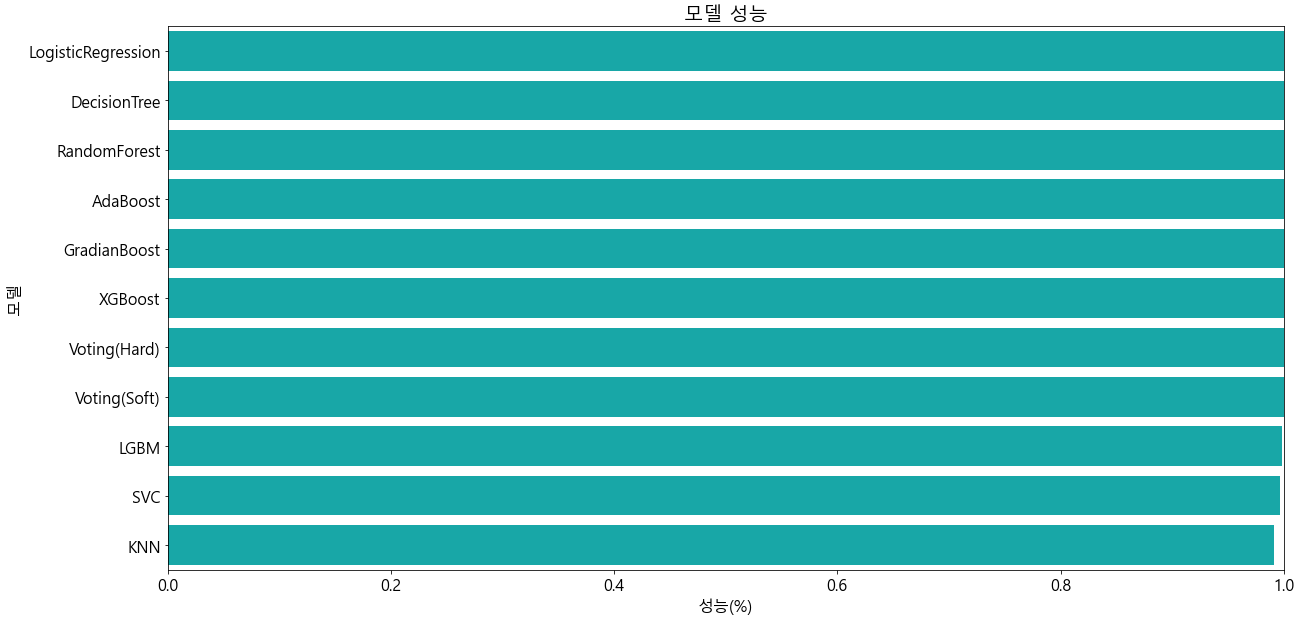

In [72]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()

### 하이퍼 파라미터 튜닝

In [73]:
# KNN
params = {
    # 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
    'n_neighbors' : list(range(1, 11))
}

# 사용할 모델 객체를 생성한다.
model1 = KNeighborsClassifier()

# 최적의 하이퍼 파라미터를 찾는다
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf1 = GridSearchCV(model1, param_grid=params, scoring='f1', cv=kfold)
grid_clf1.fit(X_train, y_train)

# 결과출력
print(f'최적의 하이퍼 파라미터 : {grid_clf1.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf1.best_score_}')

최적의 하이퍼 파라미터 : {'n_neighbors': 7}
최적의 모델 평균 성능 : 0.9912447808009345


In [74]:
# LogisticRegression 
# penalty : 규제의 종류(l1, l2, elasticnet, none)
# C : 규제의 강도 
params = {
    'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model2 = LogisticRegression()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf2 = GridSearchCV(model2, param_grid=params, scoring='f1', cv=kfold)
grid_clf2.fit(X_train, y_train)
print(f'최적의 하이퍼 파라미터 : {grid_clf2.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf2.best_score_}')

최적의 하이퍼 파라미터 : {'C': 0.0001, 'penalty': 'none'}
최적의 모델 평균 성능 : 1.0


In [75]:
# SVM(SVC)
# SVM은 penalty가 l2로 고정되어 있다
# C : 규제의 강도 
params = {
    'C' : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]
}

model3 = SVC()
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf3 = GridSearchCV(model3, param_grid=params, scoring='f1', cv=kfold)
grid_clf3.fit(X_train, y_train)
print(f'최적의 하이퍼 파라미터 : {grid_clf3.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf3.best_score_}')

최적의 하이퍼 파라미터 : {'C': 1}
최적의 모델 평균 성능 : 0.9970588235294118


In [76]:
# DecisionTree
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model4 = DecisionTreeClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf4 = GridSearchCV(model4, param_grid=params, scoring='f1', cv=kfold)
grid_clf4.fit(X_train, y_train)
print(f'최적의 하이퍼 파라미터 : {grid_clf4.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf4.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': None}
최적의 모델 평균 성능 : 1.0


In [77]:
# RandomForest
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model5 = RandomForestClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf5 = GridSearchCV(model5, param_grid=params, scoring='f1', cv=kfold)
grid_clf5.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf5.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf5.best_score_}')

최적의 하이퍼 파라미터 : {'max_depth': None, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0


In [78]:
# AdaBoost
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model6 = AdaBoostClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf6 = GridSearchCV(model6, param_grid=params, scoring='f1', cv=kfold)
grid_clf6.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf6.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf6.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.0001, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0


In [79]:
# GradianBoosting
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model7 = GradientBoostingClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf7 = GridSearchCV(model7, param_grid=params, scoring='f1', cv=kfold)
grid_clf7.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf7.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf7.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.001, 'n_estimators': 250}
최적의 모델 평균 성능 : 1.0


In [80]:
# Light GBM
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model8 = LGBMClassifier(random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf8 = GridSearchCV(model8, param_grid=params, scoring='f1', cv=kfold)
grid_clf8.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf8.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf8.best_score_}')

최적의 하이퍼 파라미터 : {'learning_rate': 0.001, 'n_estimators': 300}
최적의 모델 평균 성능 : 1.0


In [81]:
# XGBoost
# booster : 내부에 사용할 알고리즘
# learning_rate : 학습률
# n_estimators : 사용할 트리의 개수
# max_depth : 생성될 최대 질문 깊이, None은 무한대.
params = {
    'booster' : ['gbtree', 'gblinear'],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1],
    'n_estimators' : [50, 100, 150, 200, 250, 300],
    # 'max_depth' : [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
}

model9 = XGBClassifier(silent=True, verbosity=0, random_state=1)
kfold = KFold(n_splits=10, shuffle=True, random_state=1)
grid_clf9 = GridSearchCV(model9, param_grid=params, scoring='f1', cv=kfold)
grid_clf9.fit(X_train, y_train)

print(f'최적의 하이퍼 파라미터 : {grid_clf9.best_params_}')
print(f'최적의 모델 평균 성능 : {grid_clf9.best_score_}')

최적의 하이퍼 파라미터 : {'booster': 'gbtree', 'learning_rate': 0.0001, 'n_estimators': 50}
최적의 모델 평균 성능 : 1.0


In [82]:
# voting

# SVC 에서 확률을 확인할 수 있도록 설정한다.
grid_clf3.best_estimator_.probability = True

model_list = (
    ('model1', grid_clf1.best_estimator_), 
    ('model2', grid_clf2.best_estimator_),
    ('model3', grid_clf3.best_estimator_),
    ('model4', grid_clf4.best_estimator_),
    ('model5', grid_clf5.best_estimator_),
    ('model6', grid_clf6.best_estimator_),
    ('model7', grid_clf7.best_estimator_),
    ('model8', grid_clf8.best_estimator_),
    ('model9', grid_clf9.best_estimator_),
)

model10 = VotingClassifier(estimators=model_list, voting='hard')
model11 = VotingClassifier(estimators=model_list, voting='soft')

In [83]:
# voting 모델 교차 검증
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

r10 = cross_val_score(model10, X_train, y_train, scoring='f1', cv=kfold)
r11 = cross_val_score(model11, X_train, y_train, scoring='f1', cv=kfold)

In [84]:
# 시각화를 위한 데이터프레임을 생성한다.

score_list = [
    grid_clf1.best_score_, grid_clf2.best_score_, grid_clf3.best_score_,
    grid_clf4.best_score_, grid_clf5.best_score_, grid_clf6.best_score_,
    grid_clf7.best_score_, grid_clf8.best_score_, grid_clf9.best_score_,
    r10.mean(), r11.mean()
]

results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : score_list
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Score
0,LogisticRegression,1.000000
1,DecisionTree,1.000000
2,RandomForest,1.000000
3,AdaBoost,1.000000
4,GradianBoost,1.000000
5,LGBM,1.000000
6,XGBoost,1.000000
7,Voting(Hard),1.000000
8,Voting(Soft),1.000000
9,SVC,0.997059


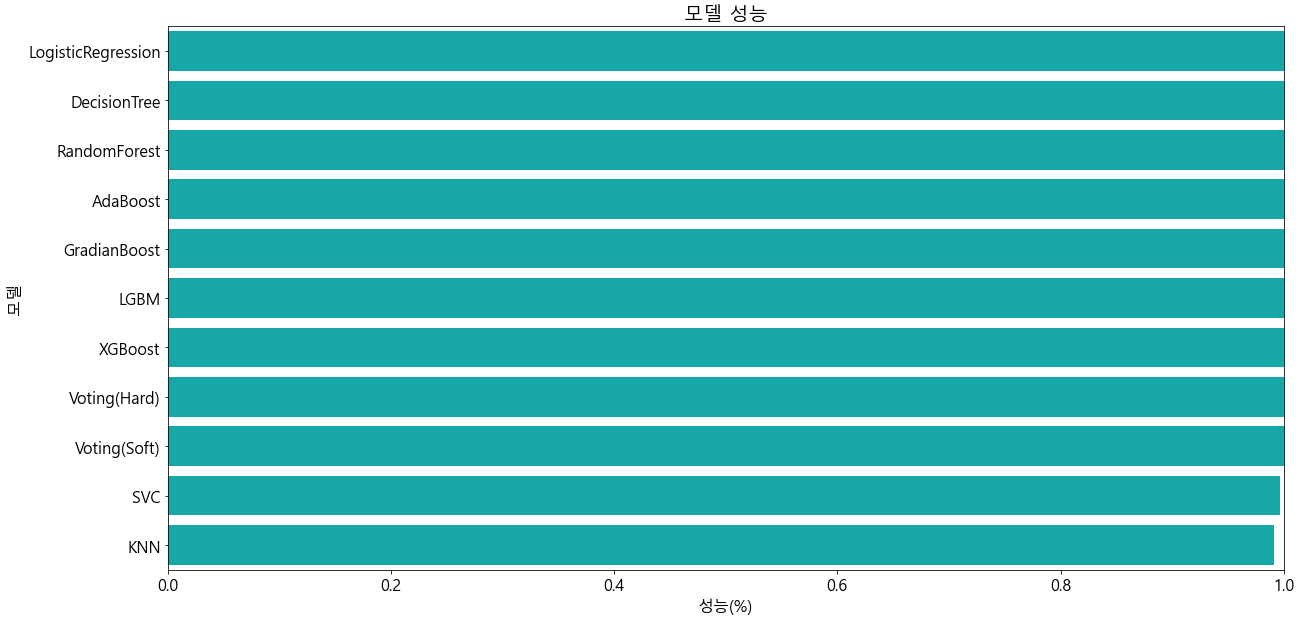

In [85]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()

### 전체 데이터를 학습과 검증으로 나눠 최종 평가를 실시한다.

In [86]:
# 각 모델에서 하이퍼 파라미터가 튜닝된 모델을 추출한다.
model1 = grid_clf1.best_estimator_
model2 = grid_clf2.best_estimator_
model3 = grid_clf3.best_estimator_
model4 = grid_clf4.best_estimator_
model5 = grid_clf5.best_estimator_
model6 = grid_clf6.best_estimator_
model7 = grid_clf7.best_estimator_
model8 = grid_clf8.best_estimator_
model9 = grid_clf9.best_estimator_

In [97]:
# 학습용과 검증용으로 나눈다.
x1, x2, y1, y2 = train_test_split(X_train, y_train, test_size=0.3, random_state=1)

In [98]:
# 학습용 데이터로 학습을 시킨다.
model1.fit(x1, y1)
model2.fit(x1, y1)
model3.fit(x1, y1)
model4.fit(x1, y1)
model5.fit(x1, y1)
model6.fit(x1, y1)
model7.fit(x1, y1)
model8.fit(x1, y1)
model9.fit(x1, y1)
model10.fit(x1, y1)
model11.fit(x1, y1)

VotingClassifier(estimators=(('model1', KNeighborsClassifier(n_neighbors=7)),
                             ('model2',
                              LogisticRegression(C=0.0001, penalty='none')),
                             ('model3', SVC(C=1, probability=True)),
                             ('model4', DecisionTreeClassifier(random_state=1)),
                             ('model5',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=1)),
                             ('model6',
                              AdaBoostClassifier(learning_rate=0.0001,
                                                 random_state=1))...
                                            gpu_id=-1, importance_type='gain',
                                            interaction_constraints='',
                                            learning_rate=0.0001,
                                            max_delta_step=0, max_depth=6,
  

In [1]:
# 검증 데이터를 통해 예측 결과를 가져온다.
y_pred1 = model1.predict(x2)
y_pred2 = model2.predict(x2)
y_pred3 = model3.predict(x2)
y_pred4 = model4.predict(x2)
y_pred5 = model5.predict(x2)
y_pred6 = model6.predict(x2)
y_pred7 = model7.predict(x2)
y_pred8 = model8.predict(x2)
y_pred9 = model9.predict(x2)
y_pred10 = model10.predict(x2)
y_pred11 = model11.predict(x2)

NameError: name 'model1' is not defined

In [101]:
# 진짜 결과와 비교해서 평가를 실시한다.
r1 = f1_score(y2, y_pred1)
r2 = f1_score(y2, y_pred2)
r3 = f1_score(y2, y_pred3)
r4 = f1_score(y2, y_pred4)
r5 = f1_score(y2, y_pred5)
r6 = f1_score(y2, y_pred6)
r7 = f1_score(y2, y_pred7)
r8 = f1_score(y2, y_pred8)
r9 = f1_score(y2, y_pred9)
r10 = f1_score(y2, y_pred10)
r11 = f1_score(y2, y_pred11)

In [103]:
results_df = pd.DataFrame({
    'Model' : ['KNN', 'LogisticRegression', 'SVC',
               'DecisionTree', 'RandomForest', 'AdaBoost',
               'GradianBoost', 'LGBM', 'XGBoost', 
               'Voting(Hard)', 'Voting(Soft)'],
    'Score' : [r1.mean(), r2.mean(), r3.mean(), r4.mean(),
               r5.mean(), r6.mean(), r7.mean(), r8.mean(),
               r9.mean(), r10.mean(), r11.mean()]
})

# score 기준으로 정렬
results_df.sort_values(by='Score', ascending=False, inplace=True)
# 인덱스를 리셋한다.
results_df.reset_index(drop=True, inplace=True)
results_df

,Model,Score
0,LogisticRegression,1.000000
1,SVC,1.000000
2,DecisionTree,1.000000
3,RandomForest,1.000000
4,AdaBoost,1.000000
5,GradianBoost,1.000000
6,LGBM,1.000000
7,XGBoost,1.000000
8,Voting(Hard),1.000000
9,Voting(Soft),1.000000


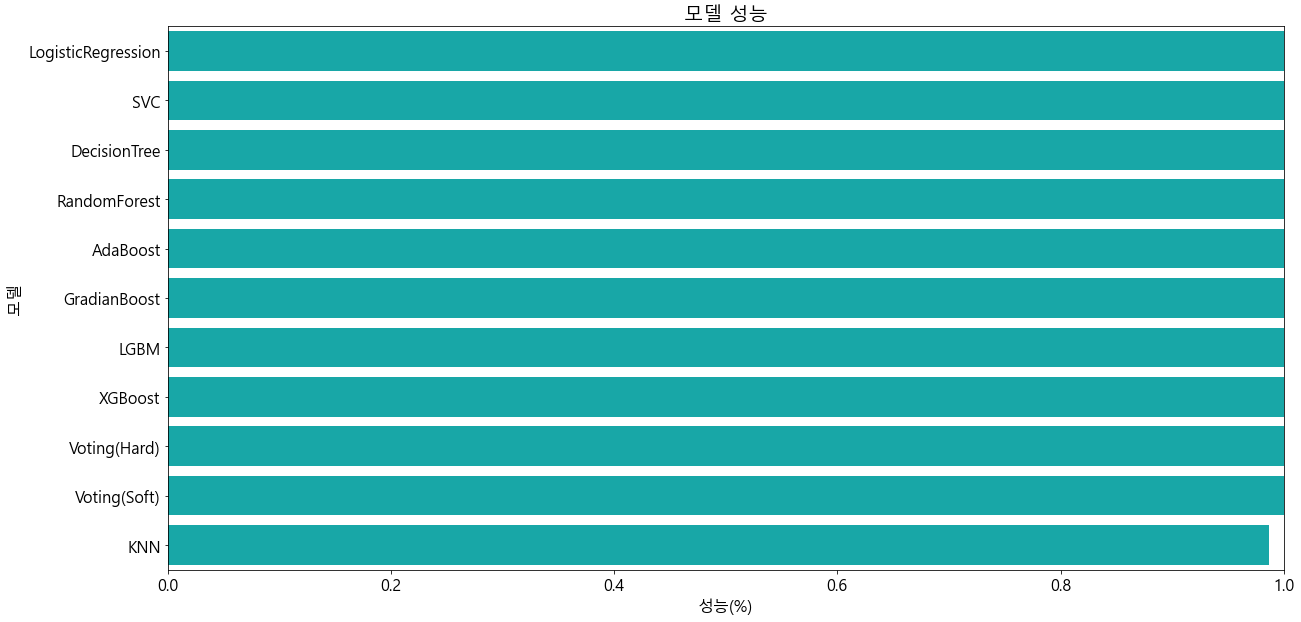

In [104]:
# 성능 평가 결과를 시각화한다.
sns.barplot(data=results_df, x='Score', y='Model', color='c')

plt.title('모델 성능')
plt.xlabel('성능(%)')
plt.ylabel('모델')
plt.xlim(0, 1)

plt.show()

### 최정 선정된 모델에 모든 데이터를 학습시킨다
- XGBoost를 선정한다.
- 이유는.. 그냥 제가 제일 좋아합니다~^^ 헤헤헤

In [117]:
model9

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=16, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)

In [127]:
model9.fit(X_train ,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.0001, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=16, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, silent=True,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=0)

### 결과를 예측한다.

In [128]:
X_test = df1[n_train:]
X_test

,Pclass,Sex,Age,Ticket,Fare,Embarked,LastName,Initial,Cabin2,FamilySize,Mean,Max,Min,Social,Wealth,Diff
891,3,0,34.500000,681,7.8292,2,258,0,0,1,0.184467,0.750000,0.0,0.162280,NaN,0.750000
892,3,1,47.000000,682,7.0000,0,652,1,0,2,0.231940,0.792000,0.0,0.549486,NaN,0.792000
893,2,0,62.000000,683,9.6875,2,653,0,3,1,0.188618,0.500000,0.0,0.287280,NaN,0.500000
894,3,0,27.000000,684,8.6625,0,654,0,0,1,0.153888,0.611111,0.0,0.315058,NaN,0.611111
895,3,1,22.000000,405,12.2875,0,389,1,0,3,0.396072,1.000000,0.0,0.629969,0.619568,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,32.252151,926,8.0500,0,850,0,0,1,0.121452,0.339009,0.0,0.191692,NaN,0.339009
1305,1,1,39.000000,273,108.9000,1,851,17,1,1,0.298510,0.742038,0.0,NaN,0.555712,0.742038
1306,3,0,38.500000,927,7.2500,0,852,0,0,1,0.118717,0.339009,0.0,NaN,NaN,0.339009
1307,3,0,32.252151,928,8.0500,0,799,0,0,1,0.121452,0.339009,0.0,0.191692,NaN,0.339009


In [129]:
# 표준화 
X_test = scaler1.transform(X_test)
X_test

array([[ 0.82737724, -0.73769513,  0.35671133, ..., -1.25482176,
                nan,  0.12055858],
       [ 0.82737724,  1.35557354,  1.29858564, ...,  0.93816452,
                nan,  0.28827151],
       [-0.36936484, -0.73769513,  2.42883482, ..., -0.54687013,
                nan, -0.87773268],
       ...,
       [ 0.82737724, -0.73769513,  0.65811111, ...,         nan,
                nan, -1.52059517],
       [ 0.82737724, -0.73769513,  0.18733606, ..., -1.08824491,
                nan, -1.52059517],
       [ 0.82737724, -0.73769513, -1.82974505, ...,  0.43466246,
         0.99480196,  1.11884985]])

In [130]:
# 예측 결과를 추출한다.
y_pred = model9.predict(X_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [131]:
y_pred_proba = model9.predict_proba(X_test)
y_pred_proba

array([[0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.49753487, 0.5024651 ],
       [0.50247586, 0.4975241 ],
       [0.49753487, 0.5024651 ],
       [0.49753487, 0.5024651 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.49753487, 0.5024651 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.49753487, 0.5024651 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.49753487, 0.5024651 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.50247586, 0.4975241 ],
       [0.

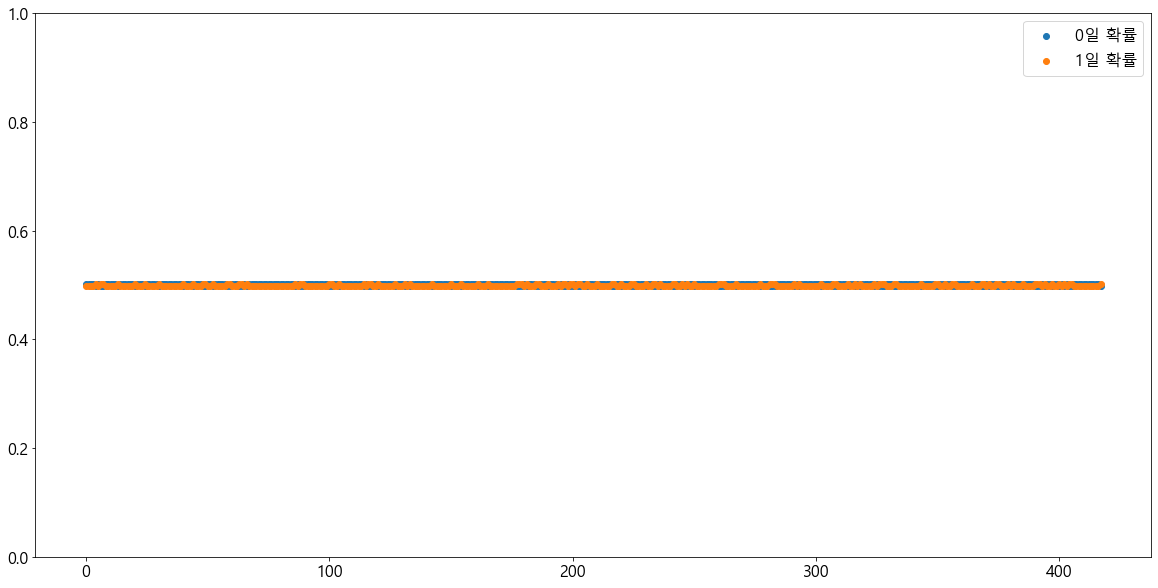

In [134]:
# 0일 확률들
a10 = y_pred_proba[:, 0]
# 1일 확률들
a11 = y_pred_proba[:, 1]

plt.scatter(list(range(len(a10))), a10, label='0일 확률')
plt.scatter(list(range(len(a11))), a11, label='1일 확률')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [136]:
# 예측 결과를 저장한다.
test_df['Survived'] = y_pred

test_df.to_csv('data/titnic_result.csv')